In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
f=[]
path = '../txtfiles-2/'
f.append(pd.read_csv(path + 'wolff_16.txt', sep=' ', header=0))
f.append(pd.read_csv(path + 'wolff_32.txt', sep=' ', header=0))
f.append(pd.read_csv(path + 'wolff_48.txt', sep=' ', header=0))
f.append(pd.read_csv(path + 'wolff_64.txt', sep=' ', header=0))
f.append(pd.read_csv(path + 'wolff_80.txt', sep=' ', header=0))
ferr=pd.read_csv('../txtfiles-4/cluster_error(all).txt', sep=' ', header=0)

g=[]
path2 = '../txtfiles-1/'
g.append(pd.read_csv(path2 + 'met_center_16.txt', sep=' ', header=0))
g.append(pd.read_csv(path2 + 'met_center_32.txt', sep=' ', header=0))
g.append(pd.read_csv(path2 + 'met_center_48.txt', sep=' ', header=0))
gerr=pd.read_csv(path2 + 'met_error.txt', sep=' ', header=0)
cases2=len(g)
cases=len(f)
cols = ['m', 'ms', 'm2', 'm4']
labels = ['L = 16', 'L = 32', 'L = 48', 'L = 64', 'L = 80']

# I. Comparison of Metropolis vs Wolff

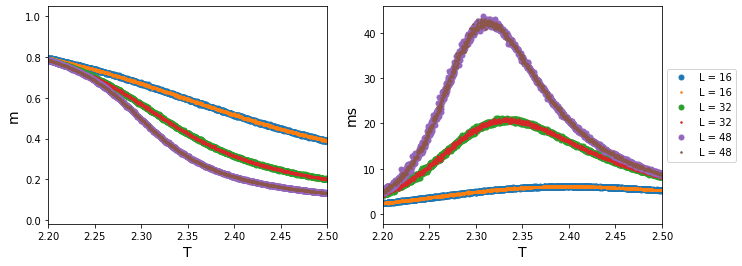

In [8]:
ax = [0, 1]
fig, (ax[0], ax[1]) = plt.subplots(1, 2, figsize=(11, 4))
for j in range (2):
    for i in range (cases2):
        ax[j].plot(g[i].temperature, g[i][cols[j]], '.', markersize = 10, markerfacecolor = None, linestyle = 'None', label=labels[i])
        ax[j].plot(f[i].temperature, f[i][cols[j]], '.', markersize=3, label=labels[i])
    ax[j].set_xlabel('T', fontsize=14)
    ax[j].set_ylabel(cols[j], fontsize=14)
    ax[j].set_xlim(2.2, 2.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


 m
0.9998824246157235
0.9998046864714437
0.9993511072158731

 ms
0.997473623212301
0.9961160962849688
0.9919592201341847


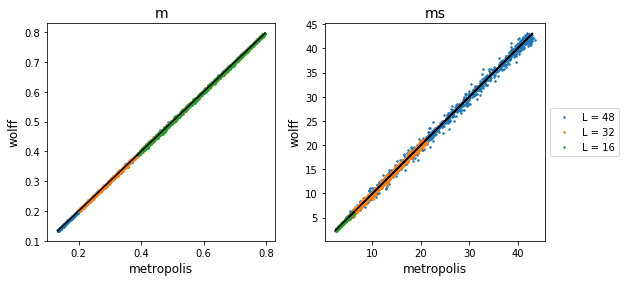

In [25]:
ax = [0, 1]
fig, (ax[0], ax[1]) = plt.subplots(1, 2, figsize=(9, 4))
for j in range (2):
    print("\n", cols[j])
    for i in range (1, cases2+1):
        a = f[cases2-i][f[cases2-i].temperature>=2.2]
        a = a[a.temperature<2.5]
        R2 = 1 - np.sum((np.array(a[cols[j]]) - np.array(g[cases2-i][cols[j]]))**2) / np.sum((a[cols[j]] - np.average(a[cols[j]]))**2)
        print(R2)
        ax[j].plot(g[cases2-i][cols[j]], a[cols[j]], '.', markersize = 3, label=labels[cases2-i])
        ax[j].plot(a[cols[j]], a[cols[j]], 'k-')
        plt.gca().set_aspect('equal', adjustable='box')
        ax[j].set_xlabel('metropolis', fontsize=12)
        ax[j].set_ylabel('wolff', fontsize=12)
        ax[j].set_title(cols[j], fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Plotting with errorbars
I didn't draw magnetization errors because it was minor. (Almost didn't show up in the plot.)

In [27]:
ff=np.zeros((cases, 3,300))
fferr=np.zeros((cases, 3, 300))
index=np.arange(300)
for i in range (cases-1):
    for j in range (324, 624):
        ff[i][0][j-324]=np.average(f[i].temperature[j*5:j*5+5])
        ff[i][1][j-324]=np.average(f[i].m[j*5:j*5+5])
        ff[i][2][j-324]=np.average(f[i].ms[j*5:j*5+5])
        fferr[i][1][j-324]=np.std(f[i].m[j*5:j*5+5])
        fferr[i][2][j-324]=np.std(f[i].ms[j*5:j*5+5])
for j in range (100, 400):
    ff[4][0][j-100]=np.average(f[4].temperature[j*5:j*5+5])
    ff[4][1][j-100]=np.average(f[4].m[j*5:j*5+5])
    ff[4][2][j-100]=np.average(f[4].ms[j*5:j*5+5])
    fferr[4][1][j-100]=np.std(f[4].m[j*5:j*5+5])
    fferr[4][2][j-100]=np.std(f[4].ms[j*5:j*5+5])
gg=np.zeros((cases2, 3,300))
ggerr=np.zeros((cases2, 3, 300))
index=np.arange(300)
for i in range (cases2):
    for j in range (300):
        gg[i][0][j]=np.average(g[i].temperature[j*5:j*5+5])
        gg[i][1][j]=np.average(g[i].m[j*5:j*5+5])
        gg[i][2][j]=np.average(g[i].ms[j*5:j*5+5])
        ggerr[i][1][j]=np.std(g[i].m[j*5:j*5+5])
        ggerr[i][2][j]=np.std(g[i].ms[j*5:j*5+5])

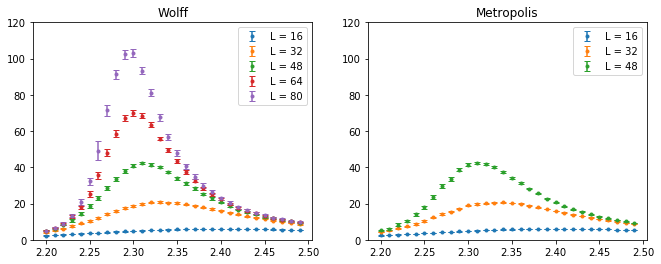

In [34]:
ax = [0, 1]
fig, (ax[0], ax[1]) = plt.subplots(1, 2, figsize=(11, 4))

for i in range (cases-1):
    ax[0].errorbar(ff[i][0][index%10==0], ff[i][2][index%10==0], yerr=ferr.err_ms[0+300*i:300+300*i][index%10==0], 
                 marker=".", linestyle="", capsize=3, label=labels[i])
ax[0].errorbar(ff[4][0][index%10==0], ff[4][2][index%10==0], yerr=ferr.err_ms[0+300*4:300+300*4][index%10==0], 
                 marker=".", linestyle="", capsize=3, label=labels[4])
ax[0].legend()
ax[0].set_title("Wolff")
for i in range (cases2):
    ax[1].errorbar(gg[i][0][index%10==0], gg[i][2][index%10==0], yerr=gerr.err_ms[0+300*i:300+300*i][index%10==0], 
                 marker=".", linestyle="", capsize=3, label=labels[i])
ax[1].legend()
ax[1].set_title("Metropolis")
ax[0].set_ylim(0, 120)
ax[1].set_ylim(0, 120)
plt.show()

### 1. Magnetization error comparison

Wolff: 


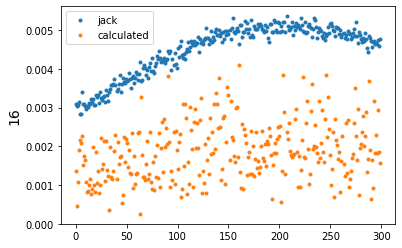

jack/calculated : 16 = 2.8473825753543056


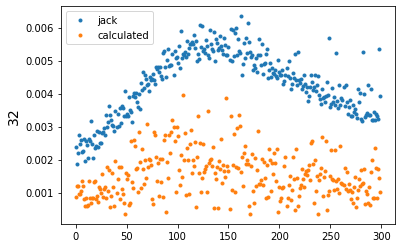

jack/calculated : 32 = 3.4025663694040422


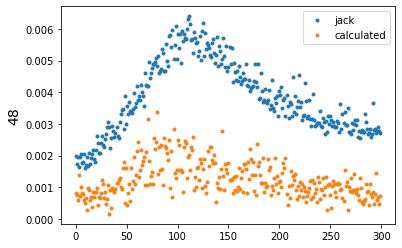

jack/calculated : 48 = 3.5790944744145183


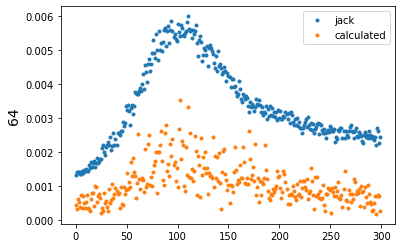

jack/calculated : 64 = 3.6299025205975126


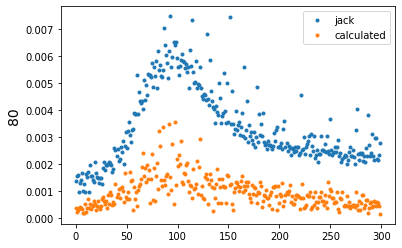

jack/calculated : 80 = 4.30381039468517
Metropolis: 


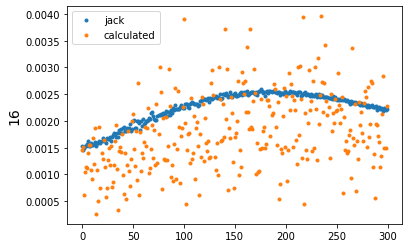

jack/calculated : 16 = 1.491425212767243


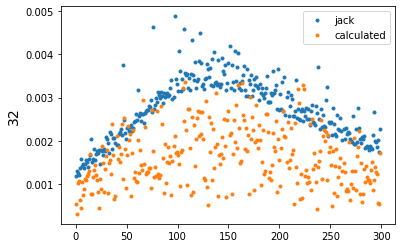

jack/calculated : 32 = 1.9565609869032474


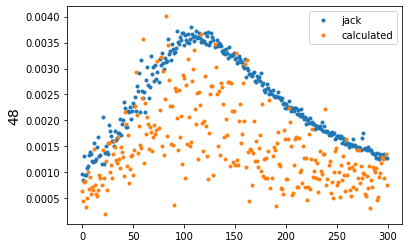

jack/calculated : 48 = 1.8929871378087955


In [7]:
print("Wolff: ")
y=np.zeros(300)
for i in range (cases):
    plt.plot(index, ferr.err_m[300*i:300*i+300], '.', label='jack')
    plt.plot(index, fferr[i][1], '.', label='calculated')
    plt.ylabel(16*(1+i), fontsize=14)
    y=(ferr.err_m[300*i:300*i+300])/(fferr[i][1])
    plt.legend()
    plt.show()
    print('jack/calculated :', 16*(1+i), '=', np.average(y))
print("Metropolis: ")
y=np.zeros(300)
for i in range (cases2):
    plt.plot(index, gerr.err_m[300*i:300*i+300], '.', label='jack')
    plt.plot(index, ggerr[i][1], '.', label='calculated')
    plt.ylabel(16*(1+i), fontsize=14)
    y=(gerr.err_m[300*i:300*i+300])/(ggerr[i][1])
    plt.legend()
    plt.show()
    print('jack/calculated :', 16*(1+i), '=', np.average(y))

### 2. Magnetic susceptibility error comparison

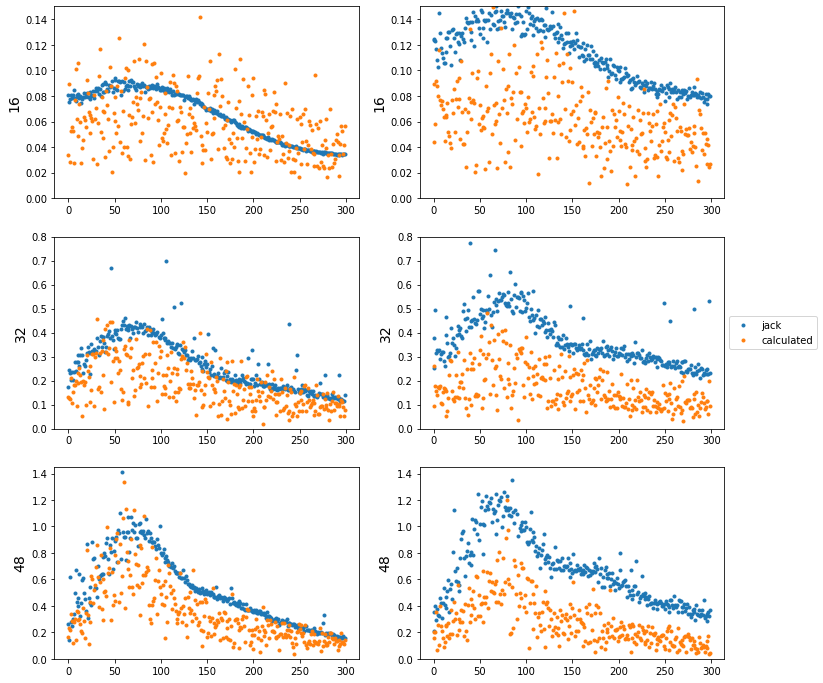

met: jack/calculated : 48 = 1.734227421048507
clu: jack/calculated : 48 = 3.0467666061307415


In [56]:
y=np.zeros(300)
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range (cases2):
    ax[i, 1].plot(index, ferr.err_ms[300*i:300*i+300], '.', label='jack')
    ax[i, 1].plot(index, fferr[i][2], '.', label='calculated')
    ax[i, 1].set_ylabel(16*(1+i), fontsize=14)
    ax[i, 0].plot(index, gerr.err_ms[300*i:300*i+300], '.', label='jack')
    ax[i, 0].plot(index, ggerr[i][2], '.', label='calculated')
    ax[i, 0].set_ylabel(16*(1+i), fontsize=14)
    y2=(ferr.err_ms[300*i:300*i+300])/(fferr[i][2])
    y=(gerr.err_ms[300*i:300*i+300])/(ggerr[i][2])
    ax[i, 0].set_ylim(0, 0.15+0.65*i)
    ax[i, 1].set_ylim(0, 0.15+0.65*i)
ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
print('met: jack/calculated :', 16*(1+i), '=', np.average(y))
print('clu: jack/calculated :', 16*(1+i), '=', np.average(y2))

# II. Plotting magnetization & magnetic susceptibility
### 1. Magnetization & Magnetic susceptibility

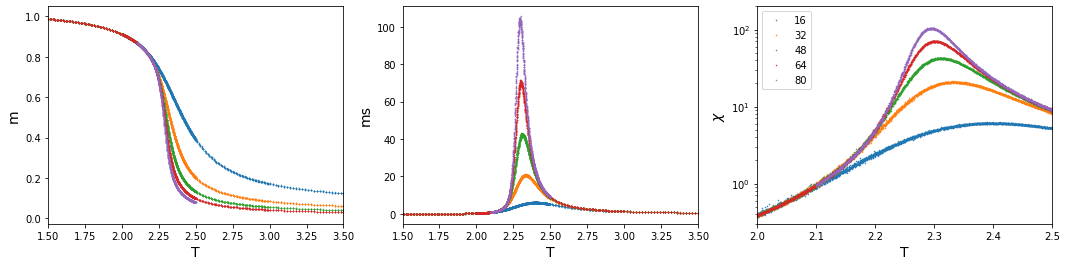

In [48]:
ax = [0, 1, 2]
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(18, 4))
for j in range (2):
    for i in range (cases):
        ax[j].plot(f[i].temperature, f[i][cols[j]], '.', markersize=1, label=16*(1+i))
    ax[j].set_xlabel('T', fontsize=14)
    ax[j].set_ylabel(cols[j], fontsize=14)
    ax[j].set_xlim(1.5, 3.5)
for i in range (cases):
    ax[2].plot(f[i].temperature, f[i].ms, '.', markersize=1, label=16*(1+i))
ax[2].set_xlim(2,2.5)
ax[2].set_ylim(0.3, 200)
ax[2].set_xlabel('T', fontsize=14)
ax[2].set_ylabel('$\chi$', fontsize=14)
ax[2].set_yscale('log')
ax[2].legend()
plt.show()

# III. Finite size scaling & Binder cumulent

maximum location = 1.9687049177749416


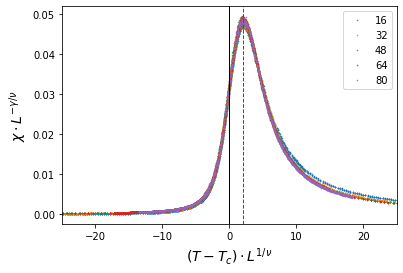

In [50]:
T_c=2/np.log(1+np.sqrt(2)) #critical temperature
nu = 1
gamma = 7/4

for i in range (cases):
    plt.plot((f[i].temperature-T_c)*(16*(1+i))**(1/nu), f[i].ms*(16*(1+i))**(-gamma/nu), '.', markersize=1, label=16*(1+i))
a = 0
for i in range (cases):
    a = a + ((f[i].temperature-T_c)*(16*(1+i))**(1/nu))[np.argmax(f[i].ms*16**(-gamma/nu))]
a /=cases
print("maximum location =", a)
plt.xlim(-25, 25)
plt.xlabel('$(T-T_c)\cdot L^{1/\\nu}$', fontsize=14)
plt.ylabel('$\chi\cdot L^{-\gamma/\\nu}$', fontsize=14)
plt.axvline(x=0, color='k', linewidth=1)
plt.axvline(x=a, color='r', linestyle='--', linewidth=1)
plt.legend()
plt.show()

### Binder cumulant

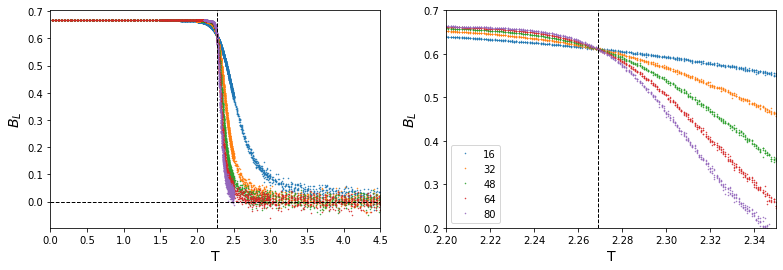

In [53]:
ax = [0, 1]
fig, (ax[0], ax[1]) = plt.subplots(1, 2, figsize=(13, 4))
for i in range (cases):
    ax[0].plot(f[i].temperature, 1-f[i].m4/(3*f[i].m2**2), '.', markersize=1, label=16*(1+i))
ax[0].axhline(y=0, color='k', linewidth=1, linestyle='--')
ax[0].axvline(x=T_c, color='k', linewidth=1, linestyle='--')
ax[0].set_xlim(0, 4.5)
ax[0].set_xlabel('T', fontsize=14)
ax[0].set_ylabel('$B_L$', fontsize=14)

for i in range (cases):
    ax[1].plot(f[i].temperature, 1-f[i].m4/(3*f[i].m2**2), '.', markersize=1, label=16*(1+i))
ax[1].axhline(y=0, color='k', linewidth=1, linestyle='--')
ax[1].set_xlim(2.2, 2.35)
ax[1].set_ylim(0.2, 0.7)
ax[1].axvline(x=T_c, color='k', linewidth=1, linestyle='--')
ax[1].set_xlabel('T', fontsize=14)
ax[1].set_ylabel('$B_L$', fontsize=14)
plt.legend()
plt.show()

### Scaling

In [12]:
points = 5
maxpoint=np.zeros((cases, points))
pseudopoint=np.zeros(cases)
maxerr=np.zeros(cases)
for j in range (cases):
    for i in range (points):
        maxpoint[j][i]=f[j].temperature[f[j].ms==sorted(f[j].ms, reverse=True)[i]]
    pseudopoint[j]=np.average(maxpoint[j])
    maxerr[j]=np.std(maxpoint[j])

all: y = 2.053837381203793 x + 2.2682600580781407
-1 : y = 2.0590522088353223 x + 2.26816171352075
-2 : y = 1.430204081632638 x + 2.2779265306122443


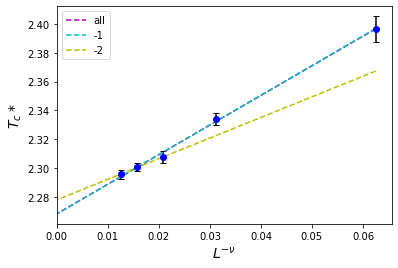

In [13]:
t = [1/(16*(1+v)) for v in range (cases)]
t.append(0)
z0 = np.polyfit(t[:cases], pseudopoint, 1) #all
z1 = np.polyfit(t[1:cases], pseudopoint[1:], 1) #exclude 16
z2 = np.polyfit(t[2:cases], pseudopoint[2:], 1) #exclude 32
p0 = np.poly1d(z0)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
print("all: y =", z0[0], "x +", z0[1])
print("-1 : y =", z1[0], "x +", z1[1])
print("-2 : y =", z2[0], "x +", z2[1])
plt.errorbar(t[:cases], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.plot(t,p0(t),"m--", label='all')
plt.plot(t,p1(t),"c--", label='-1')
plt.plot(t,p2(t),"y--", label='-2')
plt.xlabel('$L^{-\\nu}$', fontsize=14)
plt.ylabel('$T_c*$', fontsize=14)
plt.xlim(0)
plt.legend()
plt.show()

In [14]:
T_c_max = np.zeros((2**cases, cases))
zz=[]
T_c_range = np.zeros(2**cases)
for i in range (2**cases):
    for j in range (cases):
        det = int(i/(2**j))%2
        T_c_max[i][j]=pseudopoint[j]+maxerr[j]*((-1)**det)
    zz.append(np.polyfit(t[:cases], T_c_max[i], 1))
    T_c_range[i] = zz[i][1]

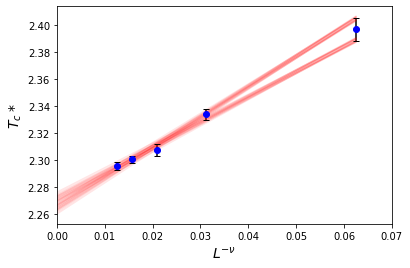

In [15]:
for i in range (2**cases):
    plt.plot(t, np.poly1d(zz[i])(t), 'r-', alpha=0.1)
plt.errorbar(t[:cases], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.xlabel('$L^{-\\nu}$', fontsize=14)
plt.ylabel('$T_c*$', fontsize=14)
plt.xlim(0, 0.07)
plt.show()

T_c = 2.2682600580781407 +/- 0.004183748218944384


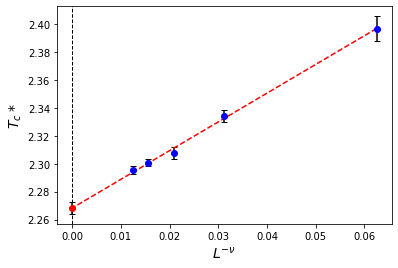

In [16]:
print("T_c =", np.average(T_c_range), "+/-", np.std(T_c_range))
plt.errorbar(t[:cases], pseudopoint, yerr=maxerr, fmt="bo", linestyle="", ecolor='k', capsize=3)
plt.errorbar(0, np.average(T_c_range), yerr=np.std(T_c_range), fmt="ro", linestyle="", ecolor='k', capsize=3)
plt.plot(t,p0(t),"r--")
plt.xlabel('$L^{-\\nu}$', fontsize=14)
plt.ylabel('$T_c*$', fontsize=14)
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.show()